In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dfply import *

%matplotlib inline

In [2]:
#Download data from: "https://btsd.ethz.ch/shareddata/"
import os
import skimage
from skimage import io
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
    return images, labels


train_data_directory = "./data/Training" 
test_data_directory = "./data/Testing"

images, labels = load_data(train_data_directory)

(array([ 15., 110.,  13.,  15.,  15.,  11.,  18., 157.,  27.,  18.,  21.,
          7.,  18.,  90.,  43.,   9.,   9.,  79.,  81., 231.,  42.,  43.,
        375.,  15.,  48.,  42.,   6.,  18., 125.,  33.,  37.,  63., 316.,
         12.,  46.,  60.,  18.,  98., 285., 196., 242., 148.,  35.,  30.,
         48.,  74.,  44., 147.,  11.,  12.,  15.,  27.,  27., 199., 118.,
         12.,  95.,  78.,  15.,  42.,   9., 282.]),
 array([ 0.        ,  0.98387097,  1.96774194,  2.9516129 ,  3.93548387,
         4.91935484,  5.90322581,  6.88709677,  7.87096774,  8.85483871,
         9.83870968, 10.82258065, 11.80645161, 12.79032258, 13.77419355,
        14.75806452, 15.74193548, 16.72580645, 17.70967742, 18.69354839,
        19.67741935, 20.66129032, 21.64516129, 22.62903226, 23.61290323,
        24.59677419, 25.58064516, 26.56451613, 27.5483871 , 28.53225806,
        29.51612903, 30.5       , 31.48387097, 32.46774194, 33.4516129 ,
        34.43548387, 35.41935484, 36.40322581, 37.38709677, 38.3709

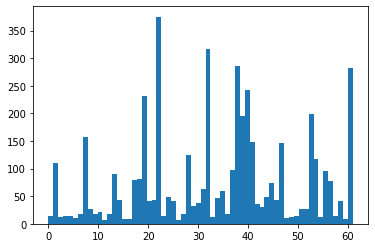

In [3]:
plt.hist(labels, 62)

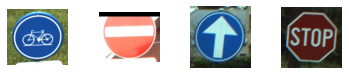

In [4]:
traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

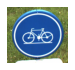

shape: (236, 256, 3), min: 0, max: 255


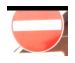

shape: (133, 164, 3), min: 0, max: 255


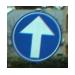

shape: (122, 121, 3), min: 0, max: 255


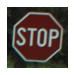

shape: (123, 123, 3), min: 0, max: 215


In [5]:
traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

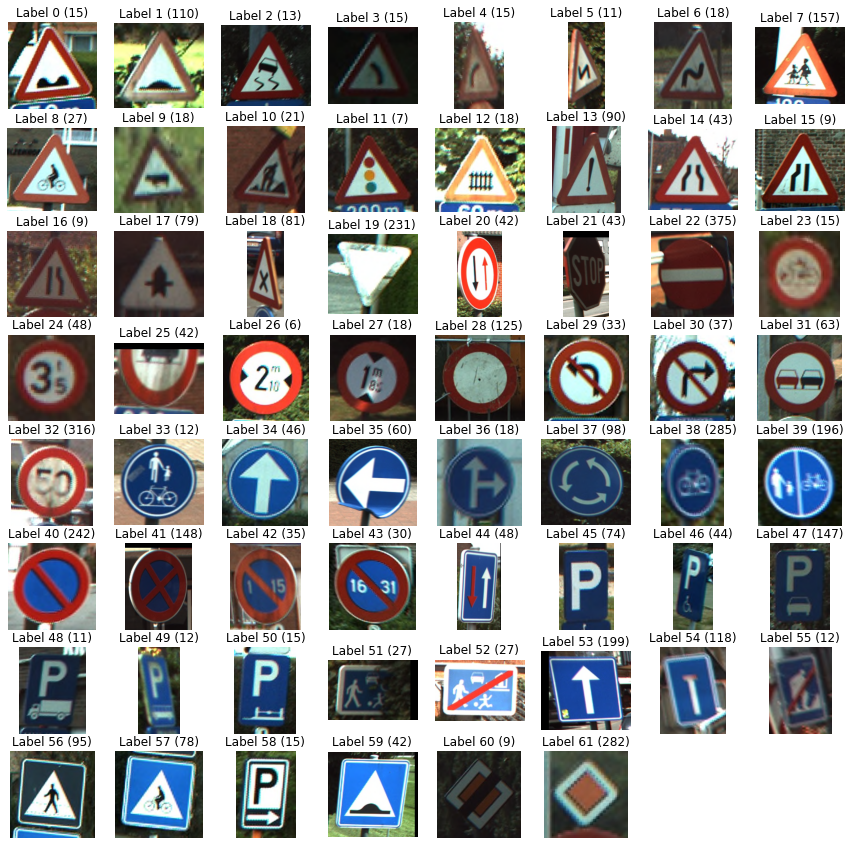

In [6]:
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

In [7]:
from skimage import transform 

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]

In [8]:
def view_signs(data):
    traffic_signs = [300, 2250, 3650, 4000]
    
    for i in range(len(traffic_signs)):
        plt.subplot(1, 4, i+1)
        plt.axis('off')
        plt.imshow(data[traffic_signs[i]])
        plt.subplots_adjust(wspace=0.5)
    
    plt.show()

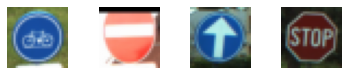

In [9]:
view_signs(images28)

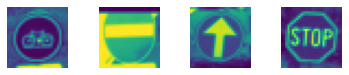

In [10]:
from skimage.color import rgb2gray

# Convert `images28` to an array
images28 = np.array(images28)

# Convert `images28` to grayscale
images28 = rgb2gray(images28)

view_signs(images28)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(62)
])

2021-10-18 14:39:40.809773: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [22]:
model.fit(images28,np.array(labels),epochs=10)

2021-10-18 14:44:36.459516: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
143/143 [==============================] - 0s 988us/step - loss: 3.0062 - accuracy: 0.3279
Epoch 2/10
143/143 [==============================] - 0s 1ms/step - loss: 1.9556 - accuracy: 0.5830
Epoch 3/10
143/143 [==============================] - 0s 1ms/step - loss: 1.4545 - accuracy: 0.6702
Epoch 4/10
143/143 [==============================] - 0s 1ms/step - loss: 1.1557 - accuracy: 0.7360
Epoch 5/10
143/143 [==============================] - 0s 985us/step - loss: 0.9700 - accuracy: 0.7749
Epoch 6/10
143/143 [==============================] - 0s 1ms/step - loss: 0.8331 - accuracy: 0.8105
Epoch 7/10
143/143 [==============================] - 0s 1ms/step - loss: 0.7301 - accuracy: 0.8286
Epoch 8/10
143/143 [==============================] - 0s 1ms/step - loss: 0.6547 - accuracy: 0.8485
Epoch 9/10
143/143 [==============================] - 0s 1ms/step - loss: 0.5896 - accuracy: 0.8651
Epoch 10/10
143/143 [==============================] - 0s 1ms/step - loss: 0.5378 - accuracy: 0.

In [23]:
test_images, test_labels = load_data(test_data_directory)

In [24]:
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]
test_images28 = rgb2gray(np.array(test_images28))

In [25]:
test_loss, test_acc = model.evaluate(test_images28,np.array(test_labels),verbose=2)
print('\nTest accuracy:',test_acc)

79/79 - 0s - loss: 0.6954 - accuracy: 0.8317

Test accuracy: 0.8317460417747498


[40, 45, 22, 30, 25, 27, 45, 37, 20, 61]
[40, 45, 22, 30, 25, 28, 45, 37, 20, 61]


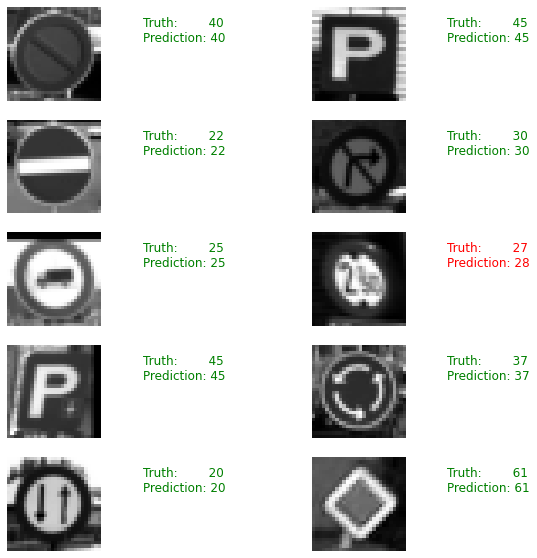

In [71]:
import random

# Pick 10 random images
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

#predict labels for selected images
predictions  = model.predict(images28)
predicted  = [np.argmax(predictions[i]) for i in range(len(predictions))]
predicted_images = [predicted[i] for i in sample_indexes]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted_images)

# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted_images[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()

Investigate impact of PCA/LDA regularization on performance of model

In [84]:
flat_images28 = [images28[i].flatten() for i in range(len(images28))]

In [89]:
flat_images28.shape

(784,)

In [120]:
from sklearn.decomposition import PCA
pca=PCA()
pca_images28 = pca.fit_transform(flat_images28)
pca_images28.shape

(4575, 784)

Text(0, 0.5, 'cumulative explained variance')

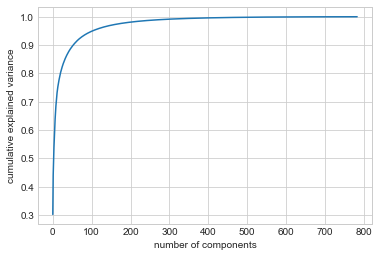

In [121]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [122]:
pca=PCA(200)
pca_images28 = pca.fit_transform(flat_images28)

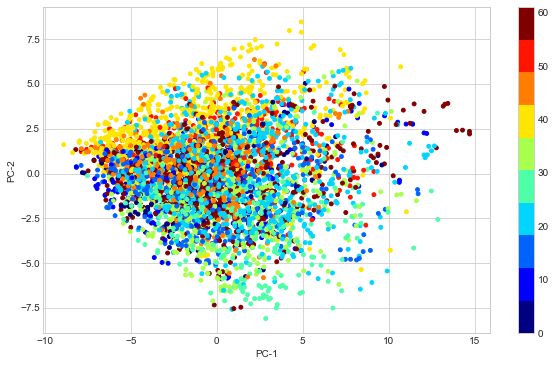

In [123]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(pca_images28[:, 0], pca_images28[:, 1], s = 15,
            cmap = c_map , c = np.array(labels))
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

In [124]:
pca_images28

array([[-9.45733109e-02, -1.21128161e+00, -7.43038067e-01, ...,
         2.48092183e-03, -1.40343355e-01, -1.49992583e-02],
       [-1.98288755e+00, -1.09904992e+00, -2.75894226e+00, ...,
        -2.77696788e-02, -8.45109489e-02,  6.02888007e-02],
       [-2.85117612e+00, -1.78588085e+00, -1.11669961e+00, ...,
        -3.26109965e-03,  4.48786536e-02, -3.09266625e-02],
       ...,
       [-3.36307490e+00,  1.46789995e+00, -3.75700017e-01, ...,
        -1.56901580e-04,  3.89436277e-02,  4.93088414e-02],
       [-2.10861029e+00, -8.73832267e-01,  1.07818439e+00, ...,
         3.36932638e-02,  2.17311033e-02, -4.55432242e-02],
       [ 5.21983050e+00, -9.60363004e-01,  9.46851740e-01, ...,
         4.55403775e-02, -4.87483452e-02, -3.46814497e-02]])

In [125]:
pca_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(62)
])

pca_model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])


pca_model.fit(pca_images28,np.array(labels),epochs=10)

Epoch 1/10
143/143 [==============================] - 0s 1ms/step - loss: 2.9540 - accuracy: 0.3657
Epoch 2/10
143/143 [==============================] - 0s 1ms/step - loss: 1.5517 - accuracy: 0.6708
Epoch 3/10
143/143 [==============================] - 0s 1ms/step - loss: 0.9502 - accuracy: 0.7989
Epoch 4/10
143/143 [==============================] - 0s 1ms/step - loss: 0.6483 - accuracy: 0.8621
Epoch 5/10
143/143 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.9056
Epoch 6/10
143/143 [==============================] - 0s 1ms/step - loss: 0.3443 - accuracy: 0.9320
Epoch 7/10
143/143 [==============================] - 0s 1ms/step - loss: 0.2643 - accuracy: 0.9506
Epoch 8/10
143/143 [==============================] - 0s 1ms/step - loss: 0.2083 - accuracy: 0.9613
Epoch 9/10
143/143 [==============================] - 0s 1ms/step - loss: 0.1671 - accuracy: 0.9685
Epoch 10/10
143/143 [==============================] - 0s 2ms/step - loss: 0.1379 - accuracy: 0.9753

In [126]:
flat_test_images28 = [test_images28[i].flatten() for i in range(len(test_images28))]
flat_test_images28_pca = pca.transform(flat_test_images28)

test_loss_pca, test_acc_pca = pca_model.evaluate(flat_test_images28_pca,np.array(test_labels),verbose=2)
print('\nTest accuracy:',test_acc_pca)

79/79 - 0s - loss: 0.4266 - accuracy: 0.8881

Test accuracy: 0.8880952596664429


In [130]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
flat_images28_lda = lda.fit(flat_images28,np.array(labels)).transform(flat_images28)

Text(0, 0.5, 'cumulative explained variance')

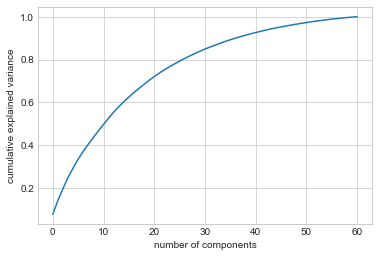

In [131]:
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

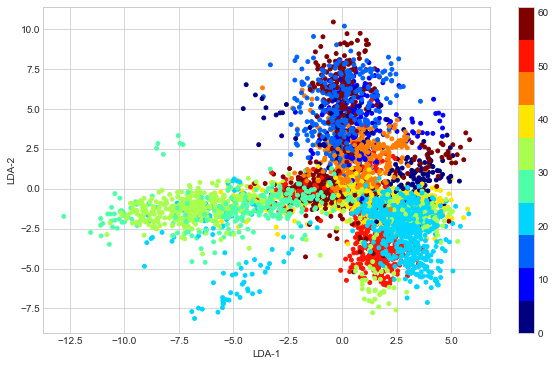

In [132]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(flat_images28_lda[:, 0], flat_images28_lda[:, 1], s = 15,
            cmap = c_map , c = np.array(labels))
plt.colorbar()
plt.xlabel('LDA-1') , plt.ylabel('LDA-2')
plt.show()

In [140]:
lda_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(62)
])

lda_model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])


lda_model.fit(flat_images28_lda,np.array(labels),epochs=10)

Epoch 1/10
143/143 [==============================] - 0s 822us/step - loss: 1.6400 - accuracy: 0.7150
Epoch 2/10
143/143 [==============================] - 0s 781us/step - loss: 0.3084 - accuracy: 0.9585
Epoch 3/10
143/143 [==============================] - 0s 824us/step - loss: 0.1686 - accuracy: 0.9711
Epoch 4/10
143/143 [==============================] - 0s 824us/step - loss: 0.1155 - accuracy: 0.9788
Epoch 5/10
143/143 [==============================] - 0s 922us/step - loss: 0.0869 - accuracy: 0.9840
Epoch 6/10
143/143 [==============================] - 0s 910us/step - loss: 0.0682 - accuracy: 0.9886
Epoch 7/10
143/143 [==============================] - 0s 906us/step - loss: 0.0550 - accuracy: 0.9904
Epoch 8/10
143/143 [==============================] - 0s 886us/step - loss: 0.0461 - accuracy: 0.9917
Epoch 9/10
143/143 [==============================] - 0s 941us/step - loss: 0.0383 - accuracy: 0.9932
Epoch 10/10
143/143 [==============================] - 0s 803us/step - loss: 0.032

In [142]:
flat_test_images28_lda = lda.transform(flat_test_images28)

test_loss_lda, test_acc_lda = lda_model.evaluate(flat_test_images28_lda,np.array(test_labels),verbose=2)
print('\nTest accuracy:',test_acc_lda)

79/79 - 0s - loss: 0.7137 - accuracy: 0.8651

Test accuracy: 0.8650793433189392
